In [1]:
# Evolution des genres dans le temps
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [2]:
# Load movies data
data_folder = '../data/MovieSummaries'
df_metadata = pd.read_csv(data_folder + '/movies_metadata_cleaned_genres.csv')

In [3]:
# Identify NaNs and remove them
problematic_values = []
for index, value in df_metadata['Grouped_genres'].items(): 
    if isinstance(value, str):
        try:
            ast.literal_eval(value)
        except (ValueError, SyntaxError):
            problematic_values.append((index, value))

            
df_metadata = df_metadata.drop([index for index, _ in problematic_values])

In [4]:
# Count of Genres per decade

#Expand the genres
df_metadata['Grouped_genres'] = df_metadata['Grouped_genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_expanded = df_metadata.explode('Grouped_genres')

# Group by 'Decade' and 'Movie_genres' and count occurrences
genre_distribution = df_expanded.groupby(['Decade', 'Grouped_genres']).size().reset_index(name="Count")

# Sort 'Decade' and 'Count' in descending order
genre_distribution = genre_distribution.sort_values(by=['Decade', 'Count'], ascending=[True, False])

In [5]:
"""
Plot the top x genre per decade

Arguments:
    top_x: the number of top genres per decade
"""
def plot_top_genres(top_x):
    # Top x genres per decade
    top_x_genres_per_year = genre_distribution.groupby(['Decade']).head(top_x)


    decade_totals = top_x_genres_per_year.groupby('Decade')['Count'].transform('sum')

    #Normalize 
    top_x_genres_per_year = top_x_genres_per_year.copy() # to avoid warnings
    top_x_genres_per_year.loc[:, 'Percentage'] = (top_x_genres_per_year['Count'] / decade_totals) * 100

    #Pivot the data  chart
    top_genres_normalized = top_x_genres_per_year.pivot(index='Decade', columns='Grouped_genres', values='Percentage').fillna(0)

    # Plot the data as a stacked bar chart
    plt.figure(figsize=(14, 8))
    top_genres_normalized.plot(kind='bar', stacked=True, colormap="tab20", width=0.8, ax=plt.gca())

    plt.title(f'Top {top_x} Movie Genres By Decade')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Total Genres (%)')
    plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid()
    plt.show()

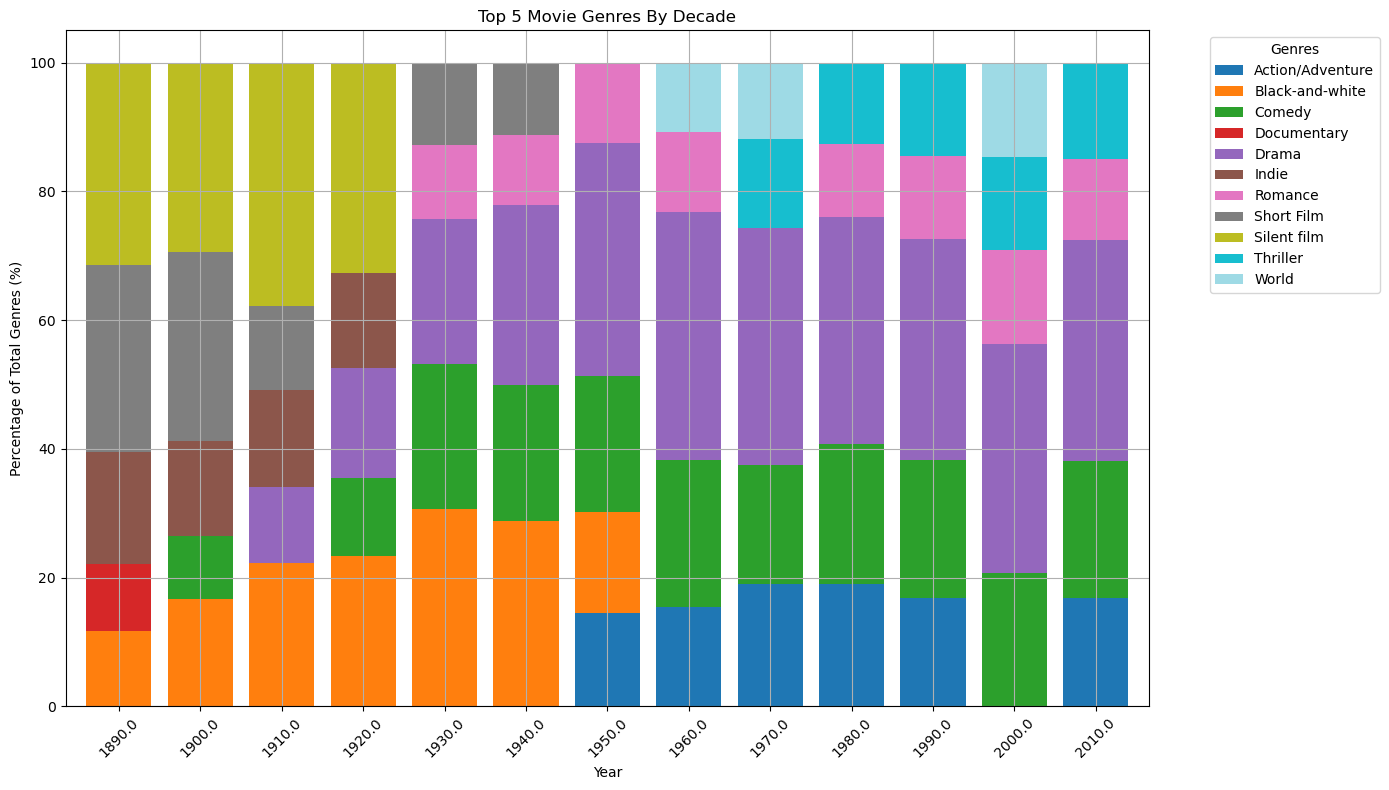

In [6]:
plot_top_genres(5)

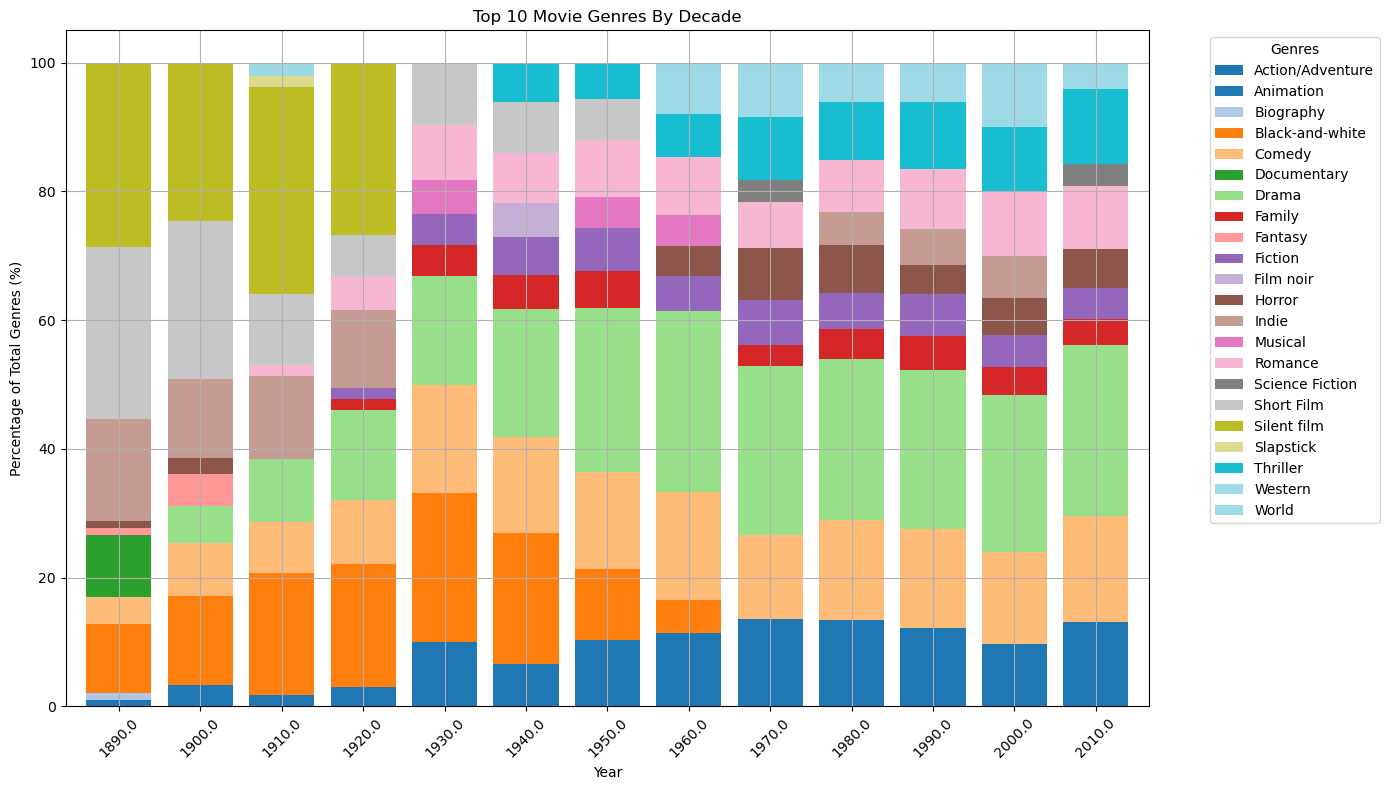

In [7]:
plot_top_genres(10)